In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import data using datetime and set index to datetime
df = pd.read_csv(r'D:\working_results\DATA.csv',
                                parse_dates=['Date'],
                                index_col=['Date'])

df.head()

,PM2.5,PM10,NO2,SO2,CO,Ozone
Date,,,,,,
2017-10-17 10:00:00,NaN,NaN,82.22,101.55,1.06,NaN
2017-10-17 11:00:00,165.34,536.91,49.09,130.76,0.98,87.85
2017-10-17 12:00:00,130.91,555.58,43.34,129.64,0.53,79.69
2017-10-17 13:00:00,126.39,556.05,32.97,103.30,0.40,78.19
2017-10-17 14:00:00,131.90,504.41,42.27,94.55,0.17,72.72


In [3]:
df.shape

(45267, 6)

In [4]:
df.describe()

,PM2.5,PM10,NO2,SO2,CO,Ozone
count,40919.000000,40626.000000,40878.000000,41085.000000,41808.000000,39960.000000
mean,110.751640,234.675670,50.998516,30.681287,0.899102,27.123344
std,86.667577,152.251427,37.644494,29.791261,0.556770,25.850885
min,0.020000,0.100000,0.010000,0.010000,0.000000,0.030000
25%,52.750000,123.227500,25.260000,11.130000,0.560000,7.580000
50%,90.610000,203.020000,40.300000,19.970000,0.800000,17.300000
75%,145.030000,309.815000,66.000000,39.570000,1.120000,39.660000
max,999.990000,999.990000,479.770000,199.810000,9.870000,194.340000


In [5]:
df.isnull().sum()

PM2.5    4348
PM10     4641
NO2      4389
SO2      4182
CO       3459
Ozone    5307
dtype: int64

In [6]:
df = df.astype(np.float32)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45267 entries, 2017-10-17 10:00:00 to 2022-12-16 12:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   40919 non-null  float32
 1   PM10    40626 non-null  float32
 2   NO2     40878 non-null  float32
 3   SO2     41085 non-null  float32
 4   CO      41808 non-null  float32
 5   Ozone   39960 non-null  float32
dtypes: float32(6)
memory usage: 1.4 MB


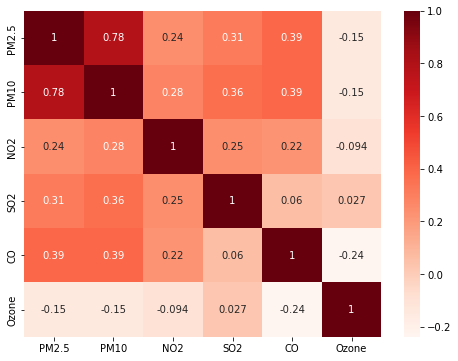

In [7]:
import seaborn as sns
plt.figure(figsize=(8,6))
cor = df.corr(method='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

<AxesSubplot:>

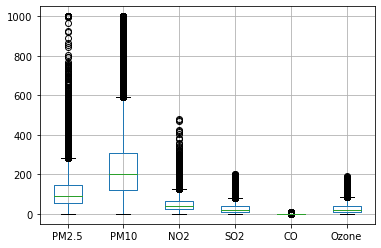

In [8]:
df.boxplot()

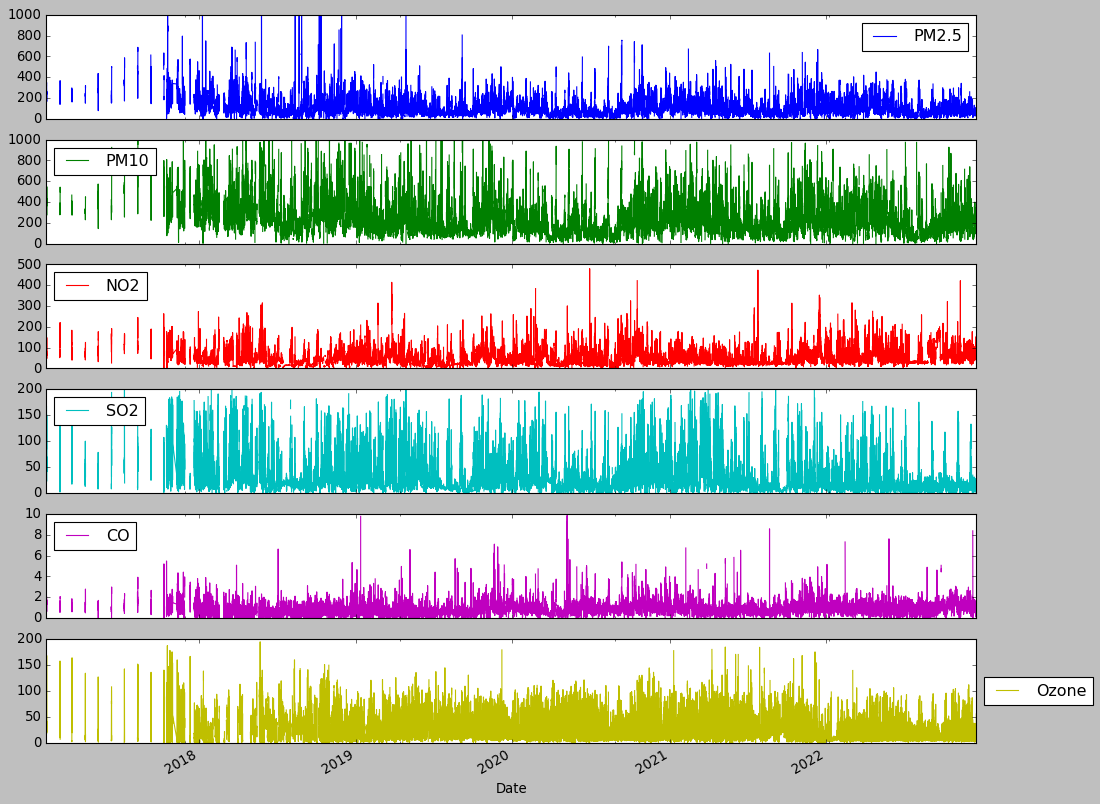

In [9]:
# A simple plot to visualize the correlation between the columns
#df.plot(subplots=True)
plt.style.use('classic')
df.plot(subplots=True,figsize=(15,13));
# Function add a legend  
#plt.legend( loc ="lower left")
#plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
#plt.legend(loc=1, frameon=True)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

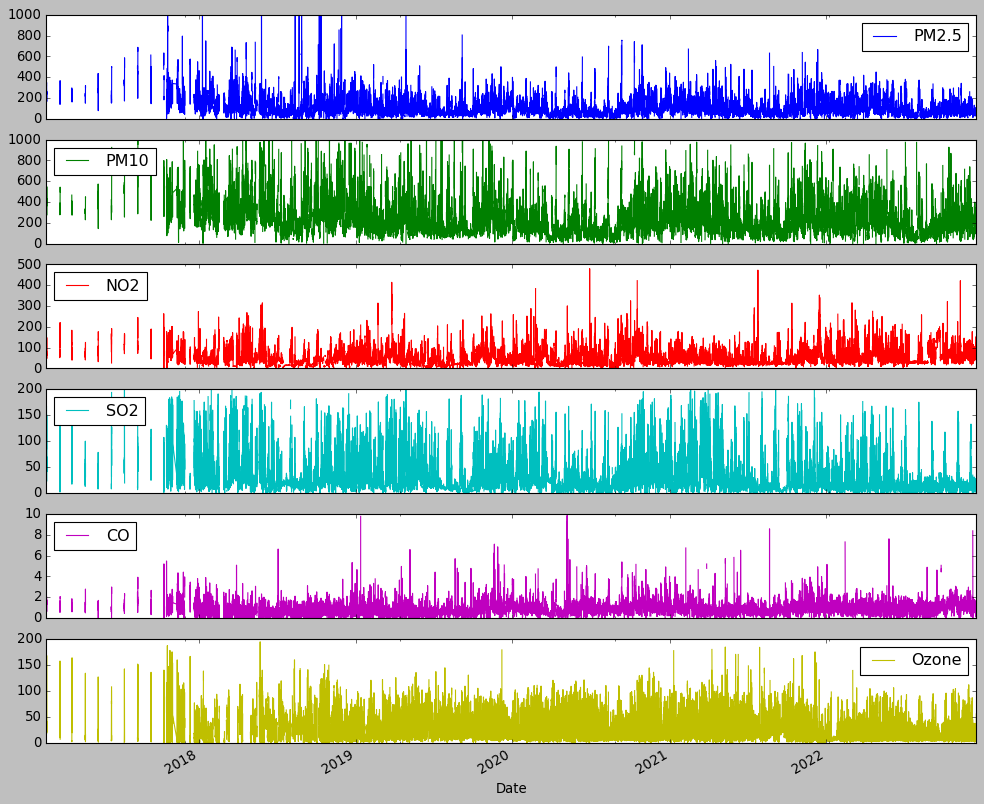

In [10]:
df.plot(subplots=True,figsize=(15,13))
plt.show()

In [11]:
# Import data using datetime and set index to datetime
df = pd.read_csv(r'D:\working_results\Book5.csv',
                                parse_dates=['Date'],
                                index_col=['Date'])

df.head()

,pm25
Date,
2017-10-17 10:00:00,110.75
2017-10-17 11:00:00,165.34
2017-10-17 12:00:00,130.91
2017-10-17 13:00:00,126.39
2017-10-17 14:00:00,131.90


In [12]:
df=df.reset_index()

df['Date']=pd.DatetimeIndex(df['Date'])
df=df.iloc[:,0:]
df=df.set_index('Date')
df

,pm25
Date,
2017-10-17 10:00:00,110.75
2017-10-17 11:00:00,165.34
2017-10-17 12:00:00,130.91
2017-10-17 13:00:00,126.39
2017-10-17 14:00:00,131.90
...,...
2022-12-16 08:00:00,51.14
2022-12-16 09:00:00,75.18
2022-12-16 10:00:00,62.42


<AxesSubplot:xlabel='Date'>

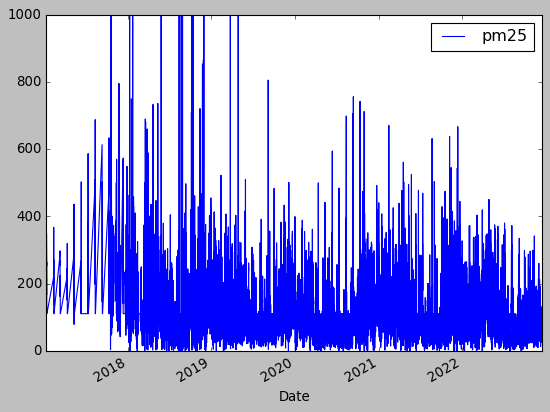

In [13]:
df.plot()

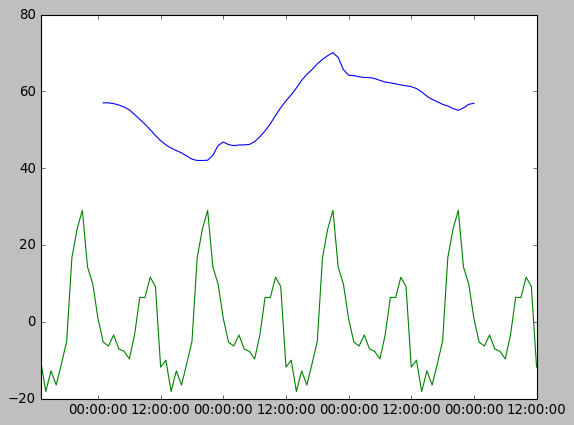

In [14]:
import statsmodels.api as sm
import time
df=df.iloc[-96:,:]
decomposition= sm.tsa.seasonal_decompose(df,model='additive', period=24)
plt.plot(df.index,decomposition.trend)#trend#seasonal
plt.plot(df.index,decomposition.seasonal)
plt.show()

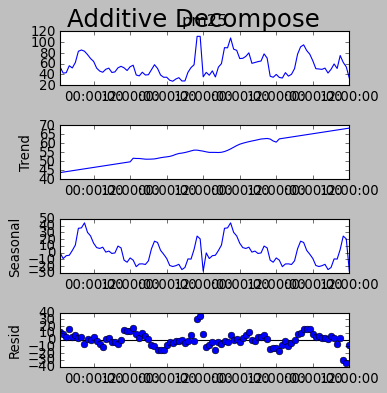

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_add = seasonal_decompose(x=df['pm25'], model='additive', extrapolate_trend='freq', period=48)
plt.rcParams.update({'figure.figsize': (5,5)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

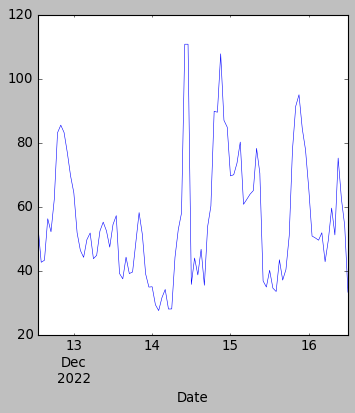

In [16]:
df['pm25'].plot(linewidth=0.5);

In [17]:
df.describe()

,pm25
count,96.000000
mean,56.100104
std,19.487168
min,27.500000
25%,42.035000
50%,51.825000
75%,66.547500
max,110.750000


In [18]:
df.corr(method='pearson')

,pm25
pm25,1.0


In [19]:
df.describe()

,pm25
count,96.000000
mean,56.100104
std,19.487168
min,27.500000
25%,42.035000
50%,51.825000
75%,66.547500
max,110.750000


C:\Users\91783\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


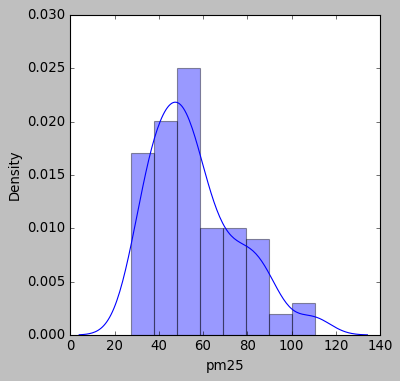

In [20]:
sns.distplot(df['pm25']) 
plt.show()

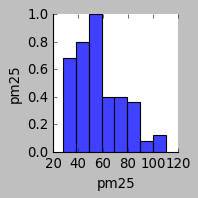

In [21]:
sns.pairplot(df)

C:\Users\91783\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pm25'>

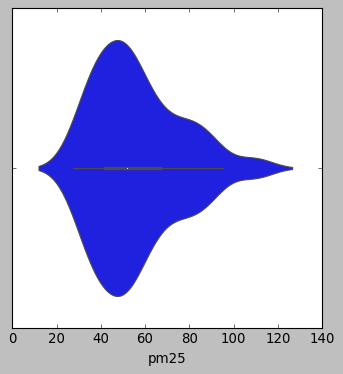

In [22]:
sns.violinplot(df['pm25'])

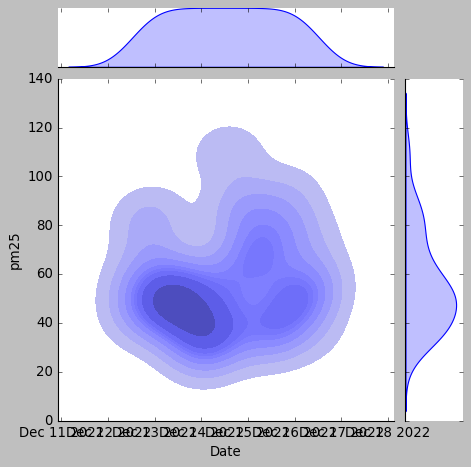

In [23]:
sns.jointplot(x = 'Date',  y = 'pm25' , data = df,  kind = 'kde', fill = True)
plt.show()

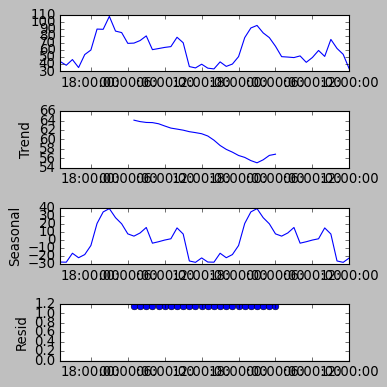

In [24]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df.iloc[-48:,:], model='additive', period=24)
result.plot()
pyplot.show()

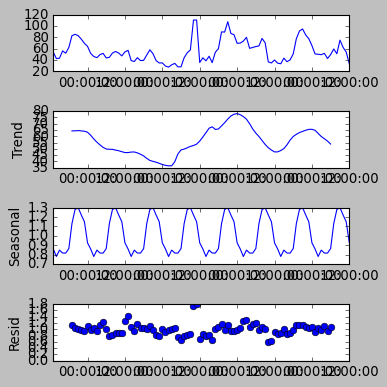

In [25]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(df.iloc[-4800:,:], model='multiplicative', period=12)
result.plot()
pyplot.show()

array([<AxesSubplot:xlabel='Date'>], dtype=object)

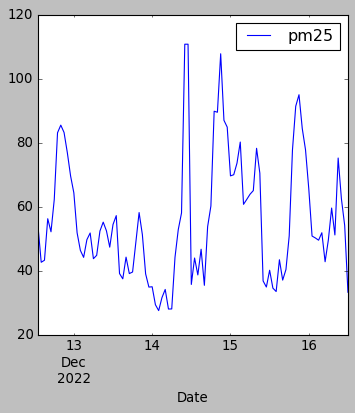

In [26]:
# A simple plot to visualize the correlation between the columns
df.plot(subplots=True)
#df.plot(subplots=True,figsize=(15,13));